In [235]:
import pandas as pd

In [236]:
data=pd.read_csv('data/pressure_drop_data.csv')

In [237]:
print('Data preview')
print(data.head())

Data preview
   Velocity (v)  Viscosity (µ)  Density (ρ)  Diameter (D)  Length (L)  \
0      2.185431       0.002047   914.399176      0.341716   36.293128   
1      4.778214       0.001988   961.086466      0.127574   34.676867   
2      3.793973       0.004625   952.032186      0.442578    5.691956   
3      3.193963       0.001998   830.779981      0.325902   46.206048   
4      1.202084       0.002088   829.849894      0.120742   28.855138   

   Pressure Drop (ΔP)  
0         5785.407158  
1        69535.236450  
2         1502.133905  
3        20601.704603  
4         4164.612684  


In [238]:
print('data stats')
print(data.describe())

data stats
       Velocity (v)  Viscosity (µ)  Density (ρ)  Diameter (D)   Length (L)  \
count   2000.000000    2000.000000  2000.000000   2000.000000  2000.000000   
mean       2.743866       0.002986   899.256981      0.269528    25.090646   
std        1.314949       0.001154    57.588210      0.129291    13.826345   
min        0.514482       0.001000   800.006144      0.050108     1.002589   
25%        1.571209       0.002003   849.387026      0.157699    13.409854   
50%        2.783081       0.002971   898.302149      0.267889    24.848488   
75%        3.878055       0.003995   947.970356      0.381710    36.754502   
max        4.998730       0.004998   999.870060      0.499757    49.975754   

       Pressure Drop (ΔP)  
count         2000.000000  
mean         15606.989648  
std          24551.519121  
min             21.238094  
25%           2121.341330  
50%           7319.600966  
75%          18567.766104  
max         238874.114967  


In [239]:
print('Missing values')
print(data.isnull().sum())

Missing values
Velocity (v)          0
Viscosity (µ)         0
Density (ρ)           0
Diameter (D)          0
Length (L)            0
Pressure Drop (ΔP)    0
dtype: int64


In [240]:
import seaborn as sns 
import matplotlib.pyplot as plt

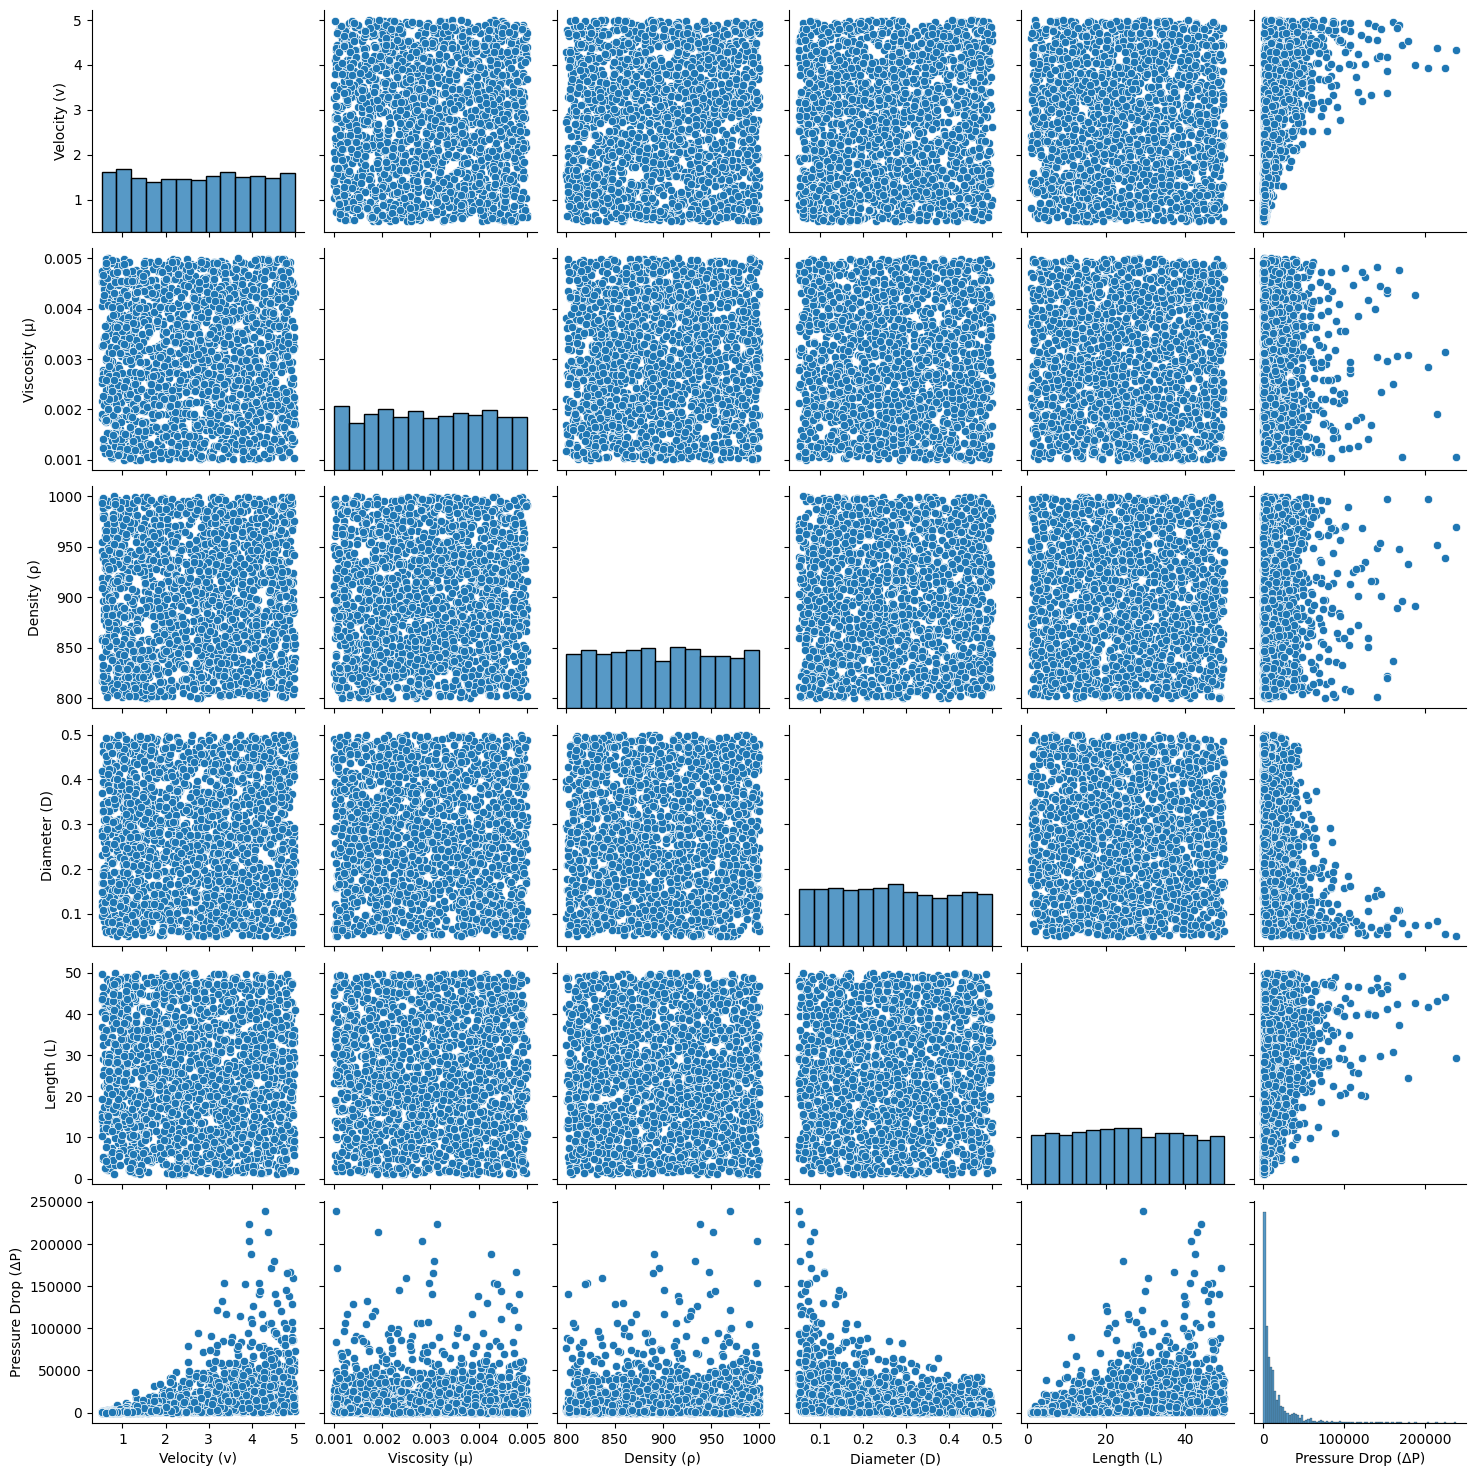

In [241]:
sns.pairplot(data)
plt.show()

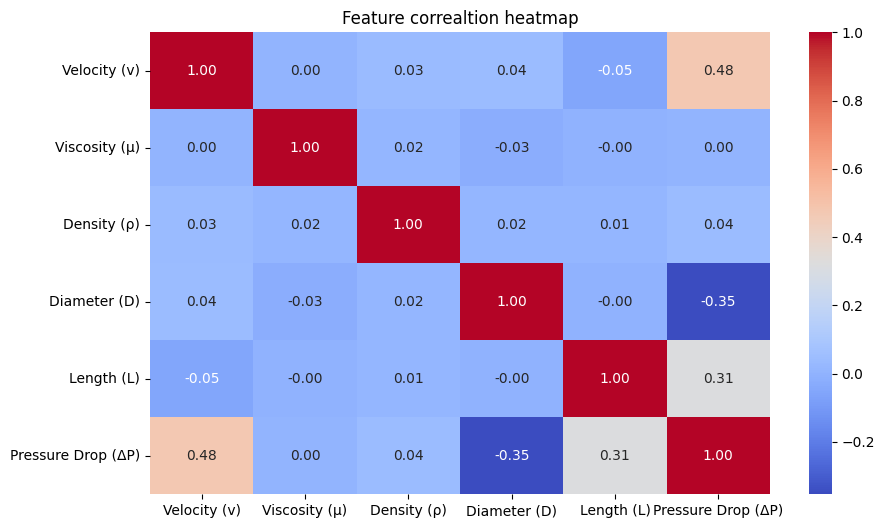

In [242]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Feature correaltion heatmap')
plt.show()

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [245]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [246]:
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (1600, 5)
Testing data size: (400, 5)


In [247]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [248]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [249]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [251]:
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [252]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: -140648149.03234696


In [253]:
best_model=grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)
print('Model trainig complete')

Model trainig complete


In [254]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred=best_model.predict(X_test_scaled)

In [255]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [256]:
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean absolute error:{mae}")

Mean absolute error:5568.602665268507


In [257]:
mse=mean_squared_error(y_test, y_pred)
print(f"Mean squared error:{mse}")

Mean squared error:121839533.83515766


In [258]:
r2=r2_score(y_test, y_pred)
print(f"r sqaured error:{r2}")

r sqaured error:0.7834679226784304


In [259]:
import numpy as np
percentage_error = 100 * (abs(y_test - y_pred) / y_test)
accuracy = np.mean(percentage_error <= 10)
print(f'Accuracy (within 10% error): {accuracy * 100:.2f}%')


Accuracy (within 10% error): 16.25%


In [260]:
y_new=best_model.predict([[2.0,0.0012,950,0.25,20]])
print(f"Predicted Pressure Drop: {y_new[0]:.2f} Pa")

Predicted Pressure Drop: 65481.66 Pa


In [261]:
import joblib
joblib.dump(best_model, 'models/pressure_drop_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [262]:
loaded_model=joblib.load('models/pressure_drop_model.pkl')

In [263]:
new_input = [[2.0, 0.0012, 950, 0.25, 20]]
predicted_pressure_drop = loaded_model.predict(new_input)
print(f"Predicted Pressure Drop: {predicted_pressure_drop[0]:.2f} Pa")

Predicted Pressure Drop: 65481.66 Pa


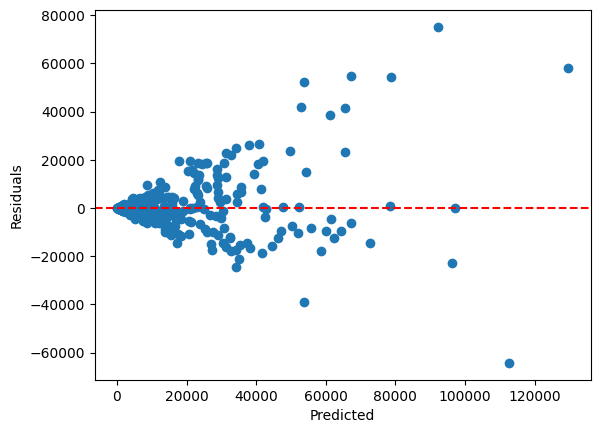

In [264]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()
